# README

I recently learned NumPy and Pandas and wanted an opportunity to practice these skills. Although I have yet to take coursework for Matplotlib and Seaborn, I trusted that I could <em>Google</em> my way through. I did not want to choose just any dataset for analysis, but one that felt personal. Two of my closest hobbies include working out and listening to music.

My general question was whether taste in music influences the subjective workout experience. 
I love listening to electronic and metal music specifically because of their intense nature and the moods that they bring in me.

Finding a dataset to answer this wasn't easy. However, performing the analysis was more important than finding an accurate dataset.
That being said I utilized ChatGPT and after some tweaking, used the code in "Step 1" to create the dataframe. Randomization was used and results should not be relied on when comparing to what occurs. 

 Hypothetical Survey: Researchers collected data from multiple locations at a state-of-the-art gym complex. After the member signed in, researchers found a moment to conduct the survey.
 
Fields include:
<ol>
<li>Date of observation</li>
<li>Workout_Type - ('Cardio', 'Strength Training', 'Yoga', 'Power Lifting', 'Calisthenics')</li>
<li>Gym_Experience - ("New", "Intermediate", "Experienced")</li>
<li>Duration_Minutes - How many minutes into a workout did the survey occur?</li>
<li>Music_Genre - The response to the following question: "What genre of music do you listen to in the gym?"</li>
    
<p> If answering "yes" to the subsequent question: "Are you primarily listening to that genre right now?", then we would use the observation in the survey.</p>
<li>Percieved_Intensity: 1-10 how hard did you try during your session?</li>
<li>Sex: Male or Female</li> 
</ol>



## 4 Questions:

#### 1.) What workouts do fans of particular genres partake in?
#### 2.) At different degrees of workout experience, does music have the same efficacy of creating an effective workout?
#### 3.) What is the relationship between workout style and music choice when observing effort?
#### 4.) What set numbers do music influence in having an effective workout?

## Step 1.) Creating the dataframe

In [62]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta


# Define parameters
num_rows = 1000
workout_types = ['Cardio', 'Strength Training', 'Power Lifting', 'Calisthenics']
music_genres = ['Electronic', 'Classic Rock', 'Hard Rock', 'Rap', 'Ambient', 'Pop', 'Metal', 'Classical', 'Country']
Sex = ['Male', 'Female']

# Generate random data
data = {
    'Date': [(pd.to_datetime('2023-12-31') - (timedelta(days=random.randint(0, 365)))*2).strftime('%Y-%m-%d') for _ in range(num_rows)],
    'Workout_Type': [random.choice(workout_types) for _ in range(num_rows)],
    'Set_Number': [random.randint(1, 3) for _ in range(num_rows)],
    'Gym_Experience': [random.choice(['New', 'Intermediate', 'Experienced']) for _ in range(num_rows)],
    'Duration_Minutes': [random.randint(1, 90) for _ in range(num_rows)],
    'Music_Genre': [random.choice(music_genres) for _ in range(num_rows)],
    'Percieved_Intensity': [random.randint(1, 10) for _ in range(num_rows)],
    'Sex': [random.choice(Sex) for _ in range(num_rows)]
}

# Create DataFrame
gym_music = pd.DataFrame(data)

# Save to CSV
#gym_music.to_excel('gym_music_survey.xlsx', index=False)



## Step 2.) Cleaning dataset, dropping unnecessary columns, and searching for missing values.
The columns I can immediately drop are: 
1. Date
2. Sex

I would also like to add a unique ID for each of my observations called "observation_id"

In [63]:
gym_music = gym_music.drop(["Date", "Sex"], axis=1)

In [64]:
# Adding a unique ID for each observation
gym_music["observation_id"] = gym_music.index + 1

In [ ]:
# Making the index the newly made "observation_id" column
gym_music.index = gym_music["observation_id"]

In [66]:
# Droping the "observation_id" column but keeping the index. 
gym_music = gym_music.drop(["observation_id"], axis=1)
gym_music.head()

,Workout_Type,Set_Number,Gym_Experience,Duration_Minutes,Music_Genre,Percieved_Intensity
observation_id,,,,,,
1,Strength Training,1,Intermediate,58,Metal,10
2,Cardio,3,New,57,Hard Rock,6
3,Calisthenics,1,Experienced,45,Classic Rock,9
4,Cardio,2,Intermediate,66,Classic Rock,10
5,Calisthenics,2,New,6,Classical,3


In [67]:
# Next, I would like to see if there are any missing values. 
gym_music.isna().sum()

Workout_Type           0
Set_Number             0
Gym_Experience         0
Duration_Minutes       0
Music_Genre            0
Percieved_Intensity    0
dtype: int64

In [ ]:
gym_music.nunique()

In [ ]:
gym_music.info()

In [ ]:
# I can cut down on memory by type casting "int64" to "int8"
gym_music = gym_music.astype({"Workout_Type": "object",
                             "Set_Number": "int8",
                             "Gym_Experience": "object",
                             "Duration_Minutes": "int8",
                             "Percieved_Intensity": "int8",
                             "Music_Genre": "object"}
                            )

## Step 3.) Answering: 
### What workouts do fans of particular genres partake in?

In [70]:
#I would like to utilize a stacked composition column chart. I will assign the dataset "gym_music" to "stacked_df"
stacked_df = gym_music

In [71]:
#Creating a count column for the count aggregate function to count rows. 
stacked_df["count"] = 1
stacked_df.head()

,Workout_Type,Set_Number,Gym_Experience,Duration_Minutes,Music_Genre,Percieved_Intensity,count
observation_id,,,,,,,
1,Strength Training,1,Intermediate,58,Metal,10,1
2,Cardio,3,New,57,Hard Rock,6,1
3,Calisthenics,1,Experienced,45,Classic Rock,9,1
4,Cardio,2,Intermediate,66,Classic Rock,10,1
5,Calisthenics,2,New,6,Classical,3,1


In [72]:
#Creating a pivot table
stacked_df.pivot_table(index=stacked_df["Music_Genre"],
                      columns=stacked_df["Workout_Type"],
                      values="count",
                      aggfunc="count")#.plot.bar(stacked = True)#.apply(lambda x: x * 100 / count(x), axis = 1).plot.bar(stacked = True)

Workout_Type,Calisthenics,Cardio,Power Lifting,Strength Training
Music_Genre,,,,
Ambient,27,24,37,30
Classic Rock,25,39,30,28
Classical,22,27,35,25
Country,24,27,33,28
Electronic,21,39,29,29
Hard Rock,33,20,32,30
Metal,27,26,21,33
Pop,19,40,22,26
Rap,22,23,22,25


In [74]:
import seaborn as sns
sns.set_style("dark")
sns.set_context("paper")

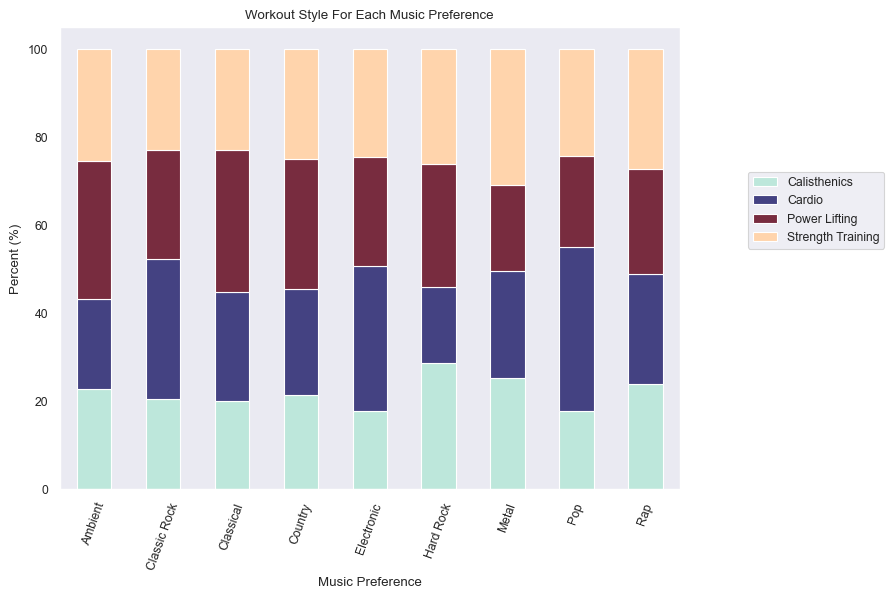

In [92]:
(stacked_df.pivot_table(index=stacked_df["Music_Genre"],
                      columns=stacked_df["Workout_Type"],
                      values="count",
                      aggfunc="count").apply(lambda x: x * 100 / sum(x), axis = 1)
                     .plot.bar(stacked = True,
                               title = "Workout Style For Each Music Preference",
                               xlabel = "Music Preference",
                               ylabel = "Percent (%)",
                               cmap = "icefire",
                               rot = 70,
                               figsize=(8,6)
                    ).legend(bbox_to_anchor=(1.1, .7)));

plt.savefig("Box.PNG", bbox_inches="tight")

### Observations
I did not expect much difference since the results were derived by the aggregation of randomization. The more observations, the more similarities the columns will have with each other. 

However, in spirit, I will try to observe key differences between groups. 

##### Pop is the preferred music choice for those using the treadmill, stair master, or the elliptical. 
##### Surprisingly classical music was the most popular within the gym's powerlifting community

## Step 4) Create Heatmaps Exploring the Relationship Between Workout Intensity and Music Taste
### Comparing
    - Genre, Workout Intensity, Gym Experience

### Comparing
    - Genre, Workout Intensity, Workout Style

In [76]:
#I would like to utilize heatmaps so I will assign the dataset "gym_music" to "heat_df"
heat_df1 = gym_music
heat_df1= heat_df1.drop('count', axis=1)

In [77]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [78]:
# Data Preparation
# Establish that rows = Genre, column = Gym_Experience, values = Intensity
heat_df1.head()

,Workout_Type,Set_Number,Gym_Experience,Duration_Minutes,Music_Genre,Percieved_Intensity
observation_id,,,,,,
1,Strength Training,1,Intermediate,58,Metal,10
2,Cardio,3,New,57,Hard Rock,6
3,Calisthenics,1,Experienced,45,Classic Rock,9
4,Cardio,2,Intermediate,66,Classic Rock,10
5,Calisthenics,2,New,6,Classical,3


In [79]:
heat_df1 = heat_df1.loc[:, ["Music_Genre", "Gym_Experience", "Percieved_Intensity"]]
heat_df1

,Music_Genre,Gym_Experience,Percieved_Intensity
observation_id,,,
1,Metal,Intermediate,10
2,Hard Rock,New,6
3,Classic Rock,Experienced,9
4,Classic Rock,Intermediate,10
5,Classical,New,3
...,...,...,...
996,Pop,Intermediate,10
997,Electronic,New,5
998,Classical,New,10


In [80]:
heat_df1 = heat_df1.groupby(['Music_Genre', 'Gym_Experience']).mean()
heat_df1 = heat_df1.unstack(level = 0)

In [81]:
heat_df1

Percieved_Intensity                                   \
Music_Genre                Ambient Classic Rock Classical   Country   
Gym_Experience                                                        
Experienced               5.121212     6.333333  5.964286  5.452381   
Intermediate              5.822222     5.400000  5.545455  5.032258   
New                       6.625000     5.615385  6.540541  4.846154   

                                                                   
Music_Genre    Electronic Hard Rock     Metal       Pop       Rap  
Gym_Experience                                                     
Experienced      6.405405  5.342105  5.468750  5.200000  6.133333  
Intermediate     4.975000  5.297297  6.023810  5.513514  5.531250  
New              5.268293  4.575000  5.333333  5.433333  5.700000

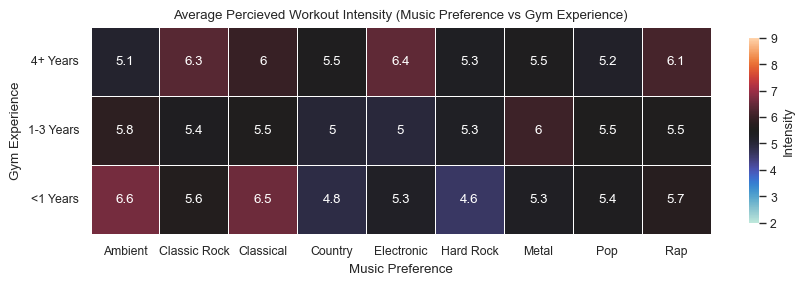

In [82]:
%matplotlib inline

plt.figure(figsize=(10,8))

sns.heatmap(heat_df1,
           vmin = 2,
           vmax = 9,
           cbar = True,
           annot = True,
           cmap = "icefire",
           square = True,
           linewidth = .5,
           xticklabels = ['Ambient', 'Classic Rock', 'Classical', 'Country', 'Electronic', 'Hard Rock', 'Metal', 'Pop', 'Rap'],
           yticklabels = ['4+ Years', '1-3 Years', '<1 Years'],
           cbar_kws={"shrink": 0.3,
                    "label": 'Intensity'});

plt.xlabel('Music Preference')
plt.ylabel('Gym Experience')
plt.title('Average Percieved Workout Intensity (Music Preference vs Gym Experience)')
plt.yticks(rotation=0);
            
plt.savefig("heat1.PNG", bbox_inches="tight")

### Observations
Oddly enough, newly acquired gym rats perceive an intense workout with ambient and classical music! Hard rock was less effective for novices. 
Like myself, the experienced gym-goer relies on electronic music to get an effective workout. 

In [83]:
# Data Preparation
# Establish that rows = Genre, column = Workout Style, values = Intensity
heat_df2 = gym_music

In [84]:
heat_df2 = heat_df2.loc[:, ["Music_Genre", "Workout_Type", "Percieved_Intensity"]]
heat_df2

,Music_Genre,Workout_Type,Percieved_Intensity
observation_id,,,
1,Metal,Strength Training,10
2,Hard Rock,Cardio,6
3,Classic Rock,Calisthenics,9
4,Classic Rock,Cardio,10
5,Classical,Calisthenics,3
...,...,...,...
996,Pop,Power Lifting,10
997,Electronic,Power Lifting,5
998,Classical,Cardio,10


In [85]:
heat_df2 = heat_df2.groupby(['Music_Genre', 'Workout_Type']).mean()
heat_df2 = heat_df2.unstack(level = 0)
heat_df2

Percieved_Intensity                                   \
Music_Genre                   Ambient Classic Rock Classical   Country   
Workout_Type                                                             
Calisthenics                 6.814815     6.360000  6.227273  5.166667   
Cardio                       4.833333     5.230769  5.777778  4.888889   
Power Lifting                5.837838     5.500000  5.714286  5.818182   
Strength Training            6.000000     6.071429  6.400000  4.500000   

                                                                      
Music_Genre       Electronic Hard Rock     Metal       Pop       Rap  
Workout_Type                                                          
Calisthenics        7.190476  5.303030  5.518519  6.052632  5.909091  
Cardio              5.743590  4.600000  5.423077  5.150000  6.000000  
Power Lifting       5.137931  4.906250  6.190476  4.636364  5.454545  
Strength Training   4.413793  5.266667  5.575758  5.846154  5.760000

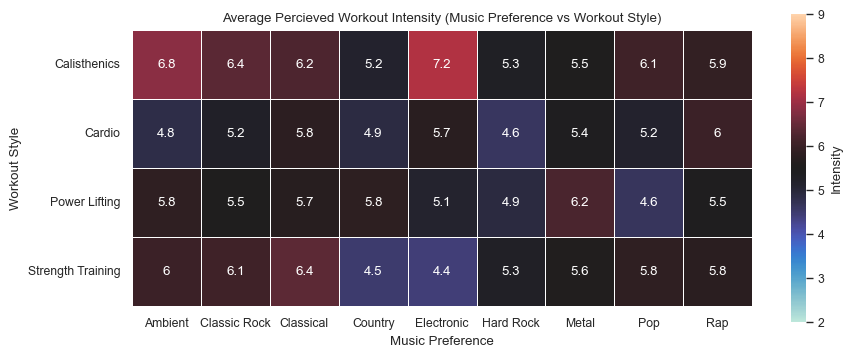

In [86]:
%matplotlib inline

plt.figure(figsize=(10,8))

sns.heatmap(heat_df2,
           vmin = 2,
           vmax = 9,
           cbar = True,
           annot = True,
           cmap = "icefire",
           square = True,
           linewidth = .5,
           xticklabels = ['Ambient', 'Classic Rock', 'Classical', 'Country', 'Electronic', 'Hard Rock', 'Metal', 'Pop', 'Rap'],
           #yticklabels = ['4+ Years', '1-3 Years', '<1 Years'],
           cbar_kws={"shrink": 0.5,
                    "label": 'Intensity'});

plt.xlabel('Music Preference')
plt.ylabel('Workout Style')
plt.title('Average Percieved Workout Intensity (Music Preference vs Workout Style)')
plt.yticks(rotation=0);

plt.savefig("heat2.PNG", bbox_inches="tight")

### Observations
Electronic music has polarizing utility amongst calisthenics and strength training athletes. 
Rap, classical rock, and classical music are more consistent in exerting effort out of athletes, regardless of workout style. 

## Step 5) Create Heatmaps Exploring the Relationship Between Workout Intensity and Music Taste


In [87]:
line = gym_music
line1 = line
line1.head()

,Workout_Type,Set_Number,Gym_Experience,Duration_Minutes,Music_Genre,Percieved_Intensity,count
observation_id,,,,,,,
1,Strength Training,1,Intermediate,58,Metal,10,1
2,Cardio,3,New,57,Hard Rock,6,1
3,Calisthenics,1,Experienced,45,Classic Rock,9,1
4,Cardio,2,Intermediate,66,Classic Rock,10,1
5,Calisthenics,2,New,6,Classical,3,1


In [88]:
line1 = line1.loc[:, ["Music_Genre", "Percieved_Intensity", "Set_Number"]]
line1

line1 = line1.groupby(['Music_Genre', "Set_Number"], as_index = False).mean()

line1

,Music_Genre,Set_Number,Percieved_Intensity
0,Ambient,1,6.256410
1,Ambient,2,5.739130
2,Ambient,3,5.696970
3,Classic Rock,1,5.190476
4,Classic Rock,2,6.069767
5,Classic Rock,3,5.918919
6,Classical,1,6.333333
7,Classical,2,5.731707
8,Classical,3,5.896552
9,Country,1,5.615385


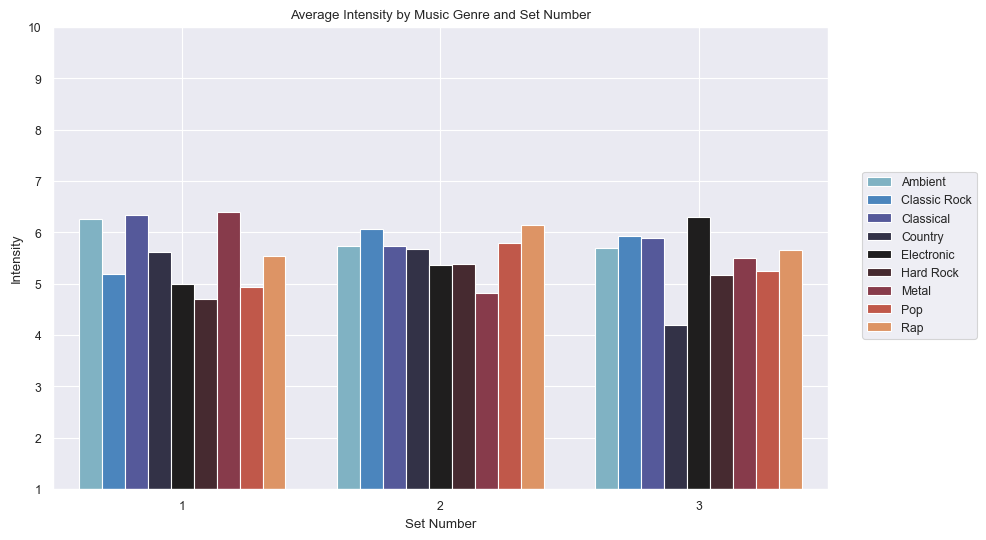

In [89]:


plt.figure(figsize=(10, 6))
sns.barplot(data=line1, x='Set_Number', y='Percieved_Intensity', hue='Music_Genre', palette='icefire')




plt.title('Average Intensity by Music Genre and Set Number')
plt.xlabel('Set Number')
plt.ylabel('Intensity')
plt.legend(title='Music Genre')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, .7))
plt.ylim((1, 10))
plt.savefig("column.PNG", bbox_inches="tight")



### Observations
At one's most exhausted state, country music is the least effective music while as electronic music is the most effective. 

## All Figures

In [90]:
from PIL import Image
from IPython.display import display

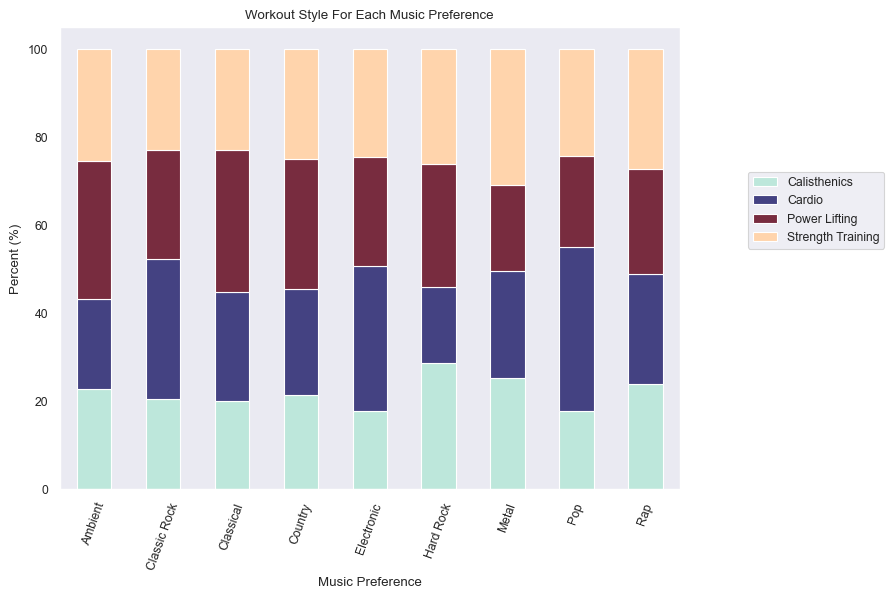

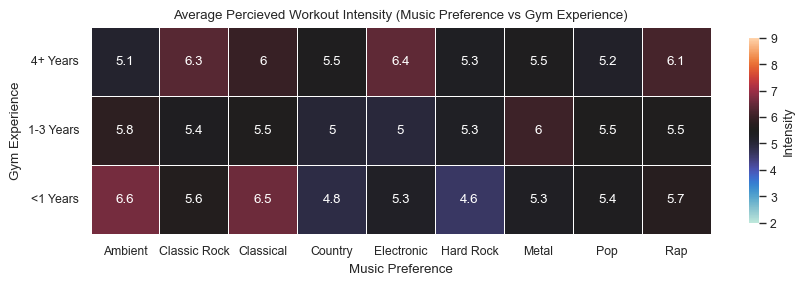

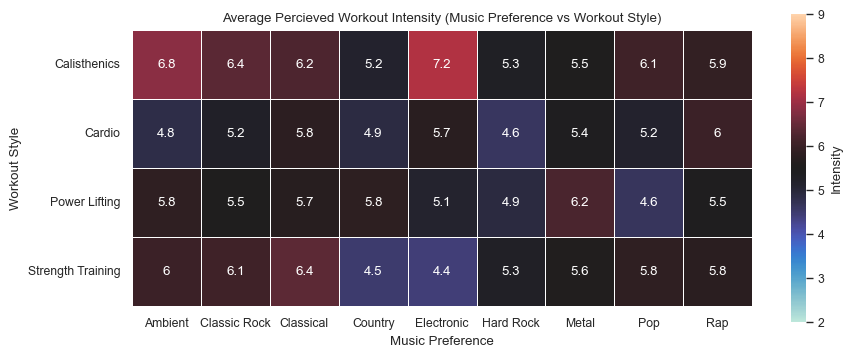

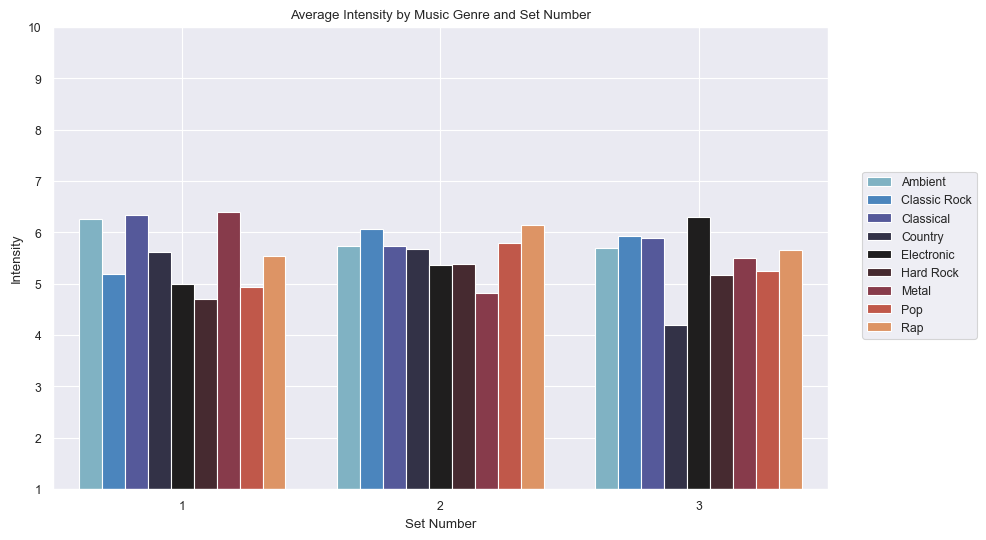

In [93]:
img = Image.open('box.png')
img2 = Image.open('heat1.png')
img3 = Image.open('heat2.png')
img4 = Image.open('column.png')

display(img, img2, img3, img4)